In [78]:
import pandas as pd

In [79]:
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mov/movies.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mov/links.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mov/ratings.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mov/tags.csv")

In [80]:
df1.shape

(9742, 3)

In [81]:
df3.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [82]:
df3.userId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [83]:
df3.userId.nunique()

610

Which movie has recieved maximum number of user ratings?


In [84]:
df1.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [85]:
df3.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [86]:
ratings = df1.merge(df3, on="movieId")

In [87]:
ratings[ratings.duplicated()] # no duplicates

,movieId,title,genres,userId,rating,timestamp


Which movie has recieved maximum number of user ratings?


In [88]:
counts = ratings.groupby("title")["rating"].count()

In [89]:
max = counts.sort_values(ascending=False).head(1)
max

title
Forrest Gump (1994)    329
Name: rating, dtype: int64

In [90]:
df4

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [91]:
tags = df1.merge(df4,on='movieId')
tags

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932
...,...,...,...,...,...,...
3678,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
3679,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
3680,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
3681,193565,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


In [92]:
abc = tags[(tags['title']== "Matrix, The (1999)")]['tag']
abc

1313          martial arts
1314                sci-fi
1315    alternate universe
1316            philosophy
1317      post apocalyptic
Name: tag, dtype: object

In [93]:
terminator_df = (ratings[(ratings['title'] == 'Terminator 2: Judgment Day (1991)')]['rating']).mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {terminator_df}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


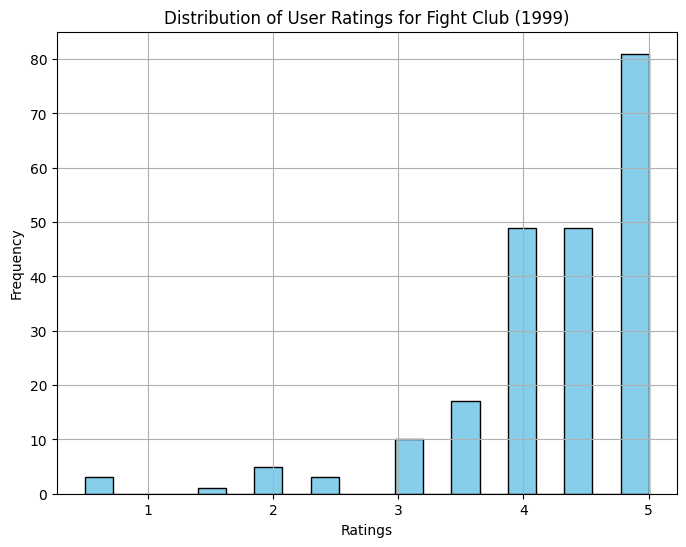

In [94]:
import matplotlib.pyplot as plt

fightclub_rating = ratings[ratings['title'] == 'Fight Club (1999)']['rating']

plt.figure(figsize=(8, 6))
plt.hist(fightclub_rating, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.grid(True)
plt.show()

<Axes: xlabel='rating', ylabel='Density'>

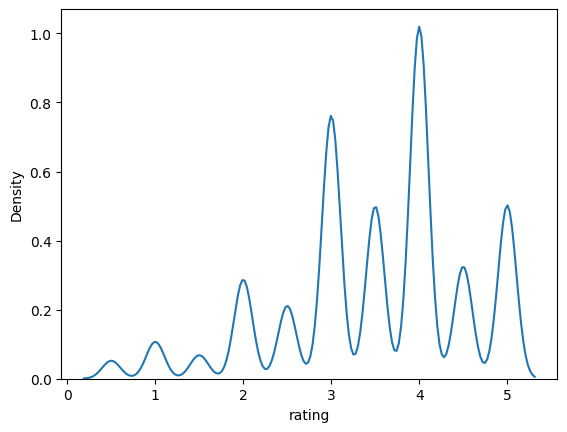

In [95]:
import seaborn as sns


data = ratings[ratings['title'] == 'Fight Club (1999)']['rating']
sns.kdeplot(ratings["rating"])

🟢 IMPORTANT NOTE 1 🟢
Now that you have a good enough understanding of the given data, apply the "Mandatory Operation" given below before solving any of the following questions.

Mandatory Operations:
1. Group the user ratings based on movieId and apply aggregation operations like count and mean on ratings.
2. Apply inner join on dataframe created from movies.csv and the grouped df from step 1.
3. Filter only those movies which have more than 50 user ratings (i.e. > 50).

Above steps will make sure that your data contains only those movies which has recieved more than 50 user ratings.

Which movie is the most popular based on  average user ratings?
*

In [96]:
print(df1.columns)
print(df2.columns)
print(df3.columns)
print(df4.columns)

Index(['movieId', 'title', 'genres'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')
Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')


In [97]:
group = df3.groupby("movieId")['rating'].agg(["count","mean"]).reset_index()
group

,movieId,count,mean
0,1,215,3.920930
1,2,110,3.431818
2,3,52,3.259615
3,4,7,2.357143
4,5,49,3.071429
...,...,...,...
9719,193581,1,4.000000
9720,193583,1,3.500000
9721,193585,1,3.500000
9722,193587,1,3.500000


In [98]:
group_mr = pd.merge(df1,group,on="movieId",how='inner')
group_mr.columns

Index(['movieId', 'title', 'genres', 'count', 'mean'], dtype='object')

In [99]:
filtered= group_mr[group_mr['count'] > 50]
filtered

,movieId,title,genres,count,mean
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615
5,6,Heat (1995),Action|Crime|Thriller,102,3.946078
6,7,Sabrina (1995),Comedy|Romance,54,3.185185
...,...,...,...,...,...
8287,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667
8354,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846
8358,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151
8457,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847


In [100]:
filtered.sort_values(by='count',ascending=False).head()

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


In [101]:
max=filtered['mean'].idxmax()

In [102]:
filtered.loc[max]

movieId                                 318
title      Shawshank Redemption, The (1994)
genres                          Crime|Drama
count                                   317
mean                               4.429022
Name: 277, dtype: object

Select all the correct options which comes under top 5 popular movies based on number of user ratings.
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [103]:
filtered.nlargest(5,'count')

,movieId,title,genres,count,mean
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329,4.164134
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307,4.197068
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279,4.161290
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446


Which Sci-Fi movie is "third most popular" based on the number of user ratings?
*
Answer this question only after applying the above mentioned "Mandatory Operration".

In [104]:
filtered.sort_values(by="count", ascending=False).iloc[2]

movieId                            296
title              Pulp Fiction (1994)
genres     Comedy|Crime|Drama|Thriller
count                              307
mean                          4.197068
Name: 257, dtype: object

In [105]:
filtered = filtered[filtered['genres'].str.contains("Sci-Fi")]


In [106]:
filtered.sort_values(by="count", ascending=False).iloc[2]

movieId                                 480
title                  Jurassic Park (1993)
genres     Action|Adventure|Sci-Fi|Thriller
count                                   238
mean                                   3.75
Name: 418, dtype: object

In [107]:
filtered.loc[filtered['mean'].idxmax()]

movieId                                          260
title      Star Wars: Episode IV - A New Hope (1977)
genres                       Action|Adventure|Sci-Fi
count                                            251
mean                                        4.231076
Name: 224, dtype: object

In [108]:
filtered.sort_values(by="count", ascending=False).head(5)

,movieId,title,genres,count,mean
1938,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238,3.750000
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224,3.970982
897,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640


Webscrapping
🟢 IMPORTANT NOTE 2 🟢
You already have a subset of data containing only those movies which has recieved more than 50 user ratings.

Using "links.csv", scrape the IMDB reviews of each movie with more than 50 user ratings. "README.md" file contains the required details.

If you are unable to write the webscraping script yourself, you can request the same by commenting LinkedIn Post.
*italicized text*

Mention the movieId of the movie which has the highest IMDB rating.
*

In [109]:
from bs4 import BeautifulSoup


In [110]:
import pandas as pd
df_links = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/mov/links.csv")

In [115]:
filter_df= group_mr[group_mr['count'] > 50]

In [116]:
links = pd.merge(filter_df, df_links, on="movieId")
links

,movieId,title,genres,count,mean,imdbId,tmdbId
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215,3.920930,114709,862.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,110,3.431818,113497,8844.0
2,3,Grumpier Old Men (1995),Comedy|Romance,52,3.259615,113228,15602.0
3,6,Heat (1995),Action|Crime|Thriller,102,3.946078,113277,949.0
4,7,Sabrina (1995),Comedy|Romance,54,3.185185,114319,11860.0
...,...,...,...,...,...,...,...
431,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,54,3.916667,993846,106646.0
432,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,52,3.778846,2278388,120467.0
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0


In [120]:
a=links['imdbId']
b=list(a)
b

[114709,
 113497,
 113228,
 113277,
 114319,
 113189,
 112346,
 112641,
 114388,
 112281,
 113161,
 113627,
 114746,
 112431,
 112818,
 112697,
 114369,
 114148,
 114814,
 113862,
 116367,
 115759,
 116483,
 112573,
 75314,
 115685,
 112442,
 112384,
 112462,
 112642,
 112715,
 112740,
 112851,
 112864,
 113071,
 113481,
 113492,
 113957,
 114898,
 109445,
 109635,
 109686,
 109707,
 110148,
 76759,
 110322,
 110632,
 114069,
 110413,
 110912,
 110932,
 111282,
 111070,
 111161,
 111280,
 108550,
 114924,
 109040,
 109444,
 109446,
 109506,
 109830,
 109831,
 110357,
 110475,
 110478,
 110622,
 111257,
 111503,
 106220,
 109254,
 109439,
 106582,
 106598,
 106673,
 106697,
 106918,
 106977,
 107144,
 107206,
 107290,
 107362,
 107614,
 107818,
 107822,
 107977,
 108052,
 108160,
 83658,
 107688,
 108333,
 108358,
 108399,
 99785,
 99653,
 103639,
 103064,
 99348,
 96895,
 102926,
 29583,
 101414,
 32910,
 100405,
 116282,
 117060,
 116136,
 117705,
 117979,
 117500,
 117998,
 57012,
 1

In [124]:
reviews=[]
rating=[]
for i in b:
    id=str(i)
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8',
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    print(response)
    soup = BeautifulSoup(response.text)
    imdb_rating = soup.find_all('a',class_='ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview' )
    import re
    res=[]
    for i in imdb_rating:
        a=i.find('span',class_='score')
        print(i)
        if a:
            regex=re.findall('\d+',a.text)
            res.append(regex[0])
        else:
            res.append(np.nan)
    reviews.append(res[0])
    imdb_ratings = soup.find('span',class_='sc-bde20123-1 cMEQkK')
    for i in imdb_ratings:
        rating.append(i)

<Response [200]>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/reviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score">778</span><span class="label">User reviews</span></span></a>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/externalreviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score">168</span><span class="label">Critic reviews</span></span></a>
<a aria-disabled="false" class="ipc-link ipc-link--baseAlt ipc-link--touch-target sc-9e83797f-2 cfrylA isReview" href="/title/tt0114709/criticreviews/?ref_=tt_ov_rt" role="button" tabindex="0"><span class="three-Elements"><span class="score"><span class="sc-b0901df4-0 bcQdDJ metacritic-score-box" style="background-color:#54A72A">96</span></span><span class="label"><span class=

In [125]:
print(len(rating))
len(reviews)


436


436

In [126]:
links['rating']= rating

In [127]:
links['reviews']= reviews

In [128]:
links['rating']= links['rating'].astype('float64')

In [129]:
top_5_movies = links.nlargest(5, 'rating')
top_5_movies


,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
53,318,"Shawshank Redemption, The (1994)",Crime|Drama,317,4.429022,111161,278.0,9.3,10
117,858,"Godfather, The (1972)",Crime|Drama,192,4.289062,68646,238.0,9.2,5
86,527,Schindler's List (1993),Drama|War,220,4.225000,108052,424.0,9.0,2
146,1203,12 Angry Men (1957),Drama,57,4.149123,50083,389.0,9.0,2
156,1221,"Godfather: Part II, The (1974)",Crime|Drama,129,4.259690,71562,240.0,9.0,1


In [133]:
sci_fi_movies2 = links[links['genres'].str.contains('Sci-Fi')]

In [134]:
sci_fi_movies2

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
12,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177,3.983051,114746,63.0,8.0,766
30,160,Congo (1995),Action|Adventure|Mystery|Sci-Fi,57,2.877193,112715,10329.0,5.3,211
35,172,Johnny Mnemonic (1995),Action|Sci-Fi|Thriller,53,2.679245,113481,9886.0,5.6,198
36,173,Judge Dredd (1995),Action|Crime|Sci-Fi,62,2.669355,113492,9482.0,5.6,308
38,208,Waterworld (1995),Action|Adventure|Sci-Fi,115,2.913043,114898,9804.0,6.3,463
...,...,...,...,...,...,...,...,...,...
427,89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69,3.869565,848228,24428.0,8.0,2
428,91500,The Hunger Games (2012),Action|Adventure|Drama|Sci-Fi|Thriller,54,3.435185,1392170,70160.0,7.2,2
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7,5
434,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,59,4.050847,2015381,118340.0,8.0,1


In [135]:
top_5_movies = sci_fi_movies2.nlargest(5, 'rating')

# Display the resulting DataFrame
top_5_movies

,movieId,title,genres,count,mean,imdbId,tmdbId,rating,reviews
424,79132,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143,4.066434,1375666,27205.0,8.8,4
140,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211,4.215640,80684,1891.0,8.7,1
248,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278,4.192446,133093,603.0,8.7,4
433,109487,Interstellar (2014),Sci-Fi|IMAX,73,3.993151,816692,157336.0,8.7,5
44,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251,4.231076,76759,11.0,8.6,2
